In [1]:
from graphviz import Digraph

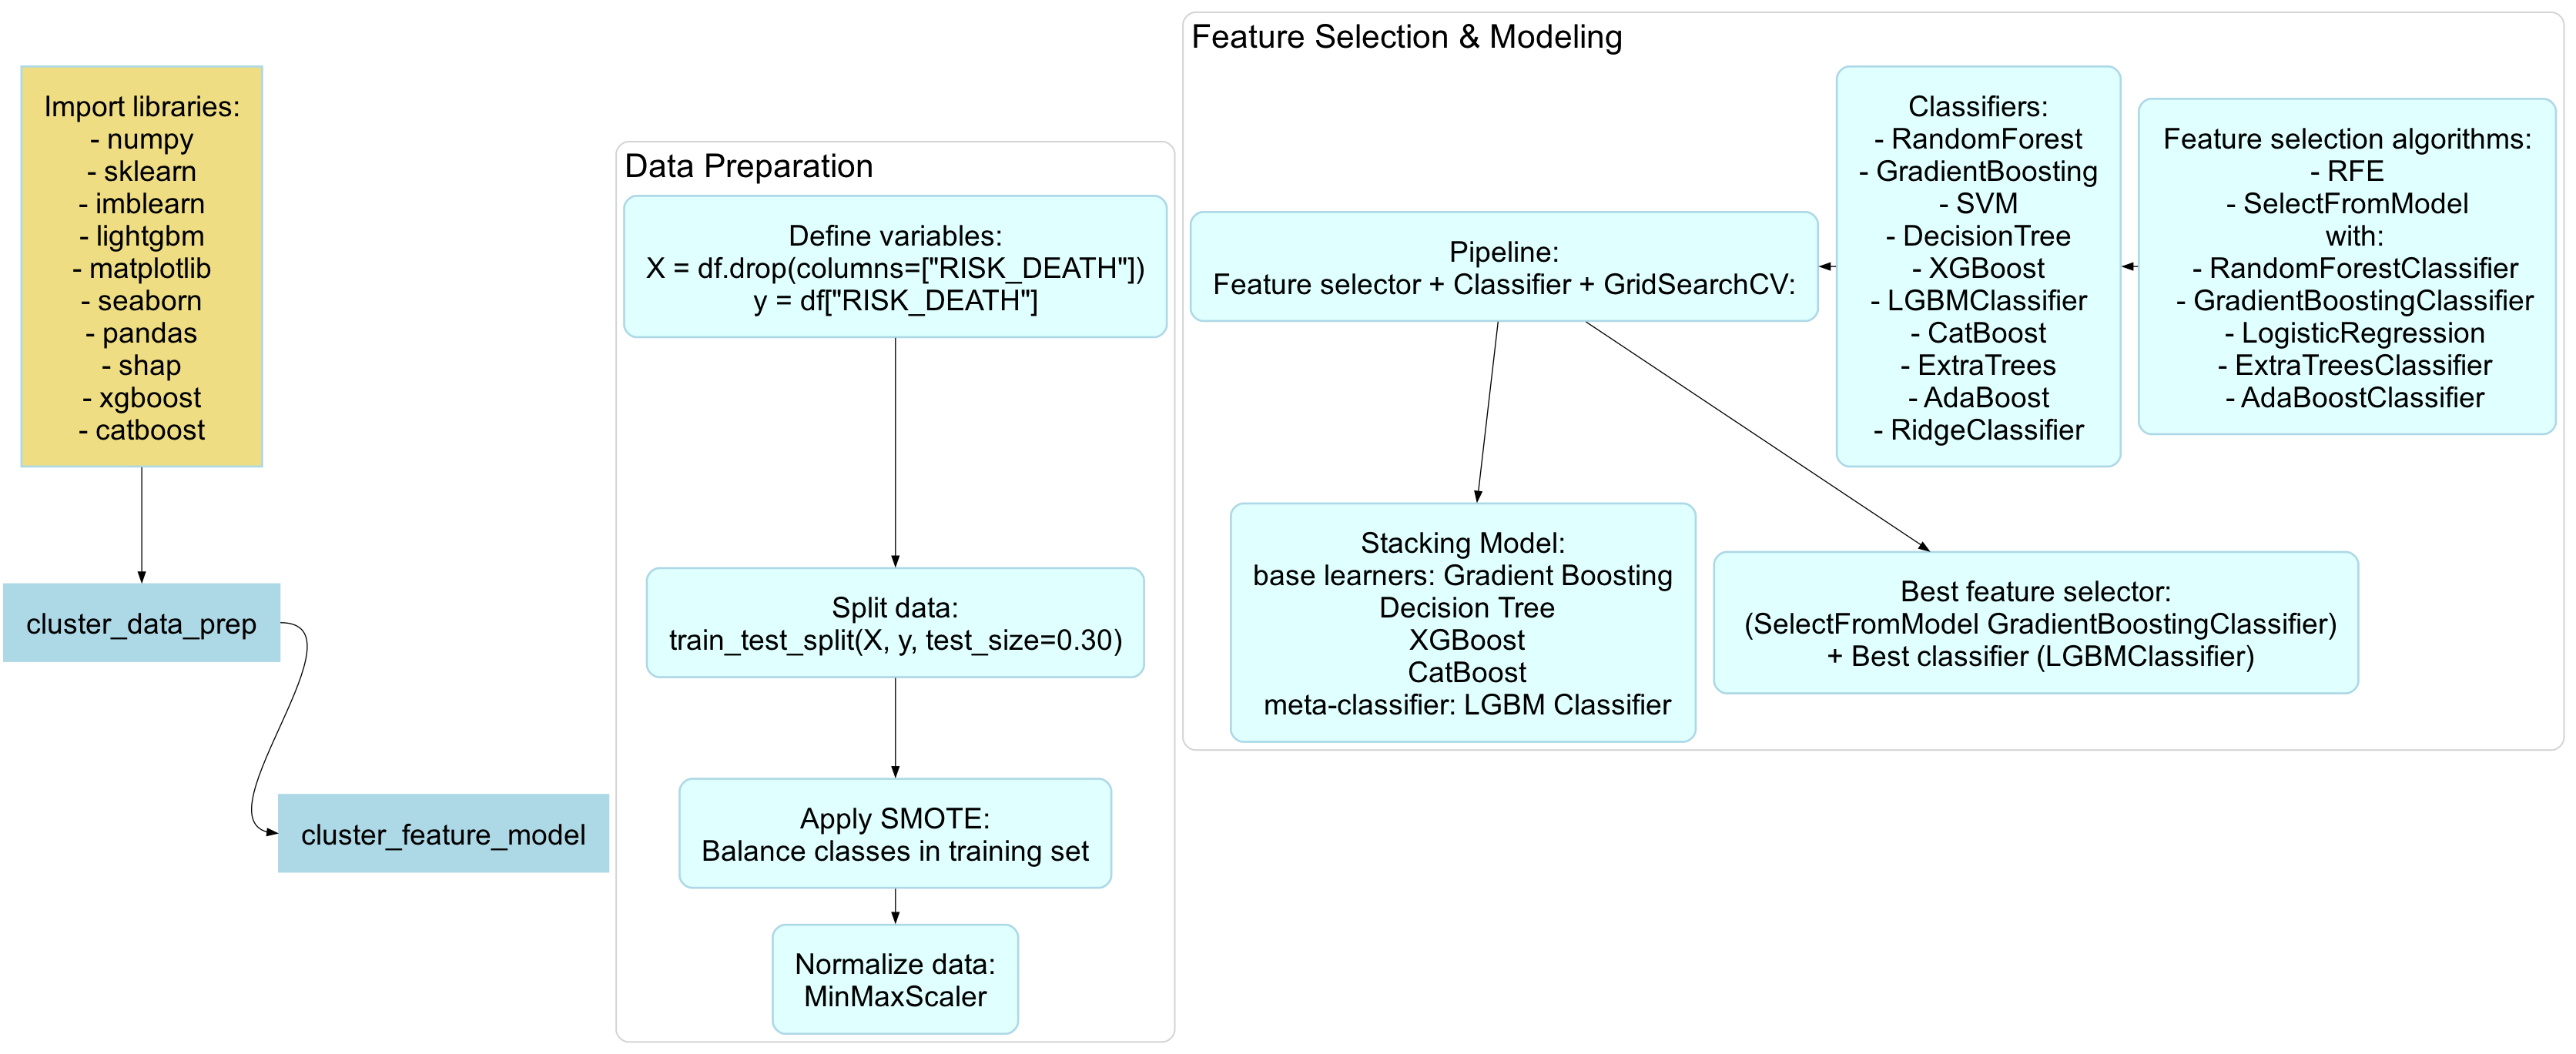

In [1]:
from graphviz import Digraph

# Create a new directed graph with a horizontal layout
dot = Digraph(comment='ML Workflow')

# Define node attributes for a consistent style with larger font
dot.attr('node', shape='box', style='filled', color='lightblue', fontname='Arial', fontsize='28', penwidth='2', margin='0.3', gradientangle='45', fontcolor='black')

# Add nodes with the provided texts
dot.node('A', 'Import libraries:\n- numpy\n- sklearn\n- imblearn\n- lightgbm\n- matplotlib\n- seaborn\n- pandas\n- shap\n- xgboost\n- catboost', fillcolor='lightgoldenrod')

# Define subgraph for data preparation
with dot.subgraph(name='cluster_data_prep') as data_prep:
    data_prep.attr(rankdir='RL', label='Data Preparation', style='rounded', color='lightgrey', fontname='Arial', fontsize='32', penwidth='1.5', labeljust='l')
    data_prep.node('B', 'Define variables:\nX = df.drop(columns=["RISK_DEATH"])\ny = df["RISK_DEATH"]', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_prep.node('C', 'Split data:\ntrain_test_split(X, y, test_size=0.30)', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_prep.node('D', 'Apply SMOTE:\nBalance classes in training set', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_prep.node('E', 'Normalize data:\nMinMaxScaler', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_prep.edges([('B', 'C'), ('C', 'D'), ('D', 'E')])

# Define subgraph for feature selection and modeling
with dot.subgraph(name='cluster_feature_model') as feature_model:
    feature_model.attr(rankdir='RL', label='Feature Selection & Modeling', style='rounded', color='lightgrey', fontname='Arial', fontsize='32', penwidth='1.5', labeljust='l')
    feature_model.node('F', 'Feature selection algorithms:\n- RFE\n- SelectFromModel\n  with:\n  - RandomForestClassifier\n  - GradientBoostingClassifier\n  - LogisticRegression\n  - ExtraTreesClassifier\n  - AdaBoostClassifier', shape='box', fillcolor='lightcyan', style='rounded,filled', rankdir='RL')
    feature_model.node('G', 'Classifiers:\n- RandomForest\n- GradientBoosting\n- SVM\n- DecisionTree\n- XGBoost\n- LGBMClassifier\n- CatBoost\n- ExtraTrees\n- AdaBoost\n- RidgeClassifier', shape='box', fillcolor='lightcyan', style='rounded,filled', rankdir='RL')
    feature_model.node('H', 'Pipeline:\nFeature selector + Classifier + GridSearchCV:', shape='box', fillcolor='lightcyan', style='rounded,filled')
    feature_model.node('I', 'Stacking Model:\nbase learners: Gradient Boosting\n Decision Tree\n XGBoost\n CatBoost\n meta-classifier: LGBM Classifier', shape='box', fillcolor='lightcyan', style='rounded,filled')
    feature_model.node('J', 'Best feature selector:\n (SelectFromModel GradientBoostingClassifier)\n + Best classifier (LGBMClassifier)', shape='box', fillcolor='lightcyan', style='rounded,filled')

    # Add edges with constraint=False to allow them to go against the overall direction
    feature_model.edge('F', 'G', rankdir='RL', constraint='false')
    feature_model.edge('G', 'H', rankdir='RL', constraint='false')
    feature_model.edge('H', 'I')
    feature_model.edge('H', 'J')

# Add edges from main nodes to subgraphs
dot.edge('A', 'cluster_data_prep')
dot.edge('cluster_data_prep:e', 'cluster_feature_model:w')

# Save and render the flowchart
dot.render('flowchart', format='png', cleanup=False)

# Display the flowchart (optional, useful in Jupyter notebooks)
from IPython.display import Image
Image(filename='flowchart.png')

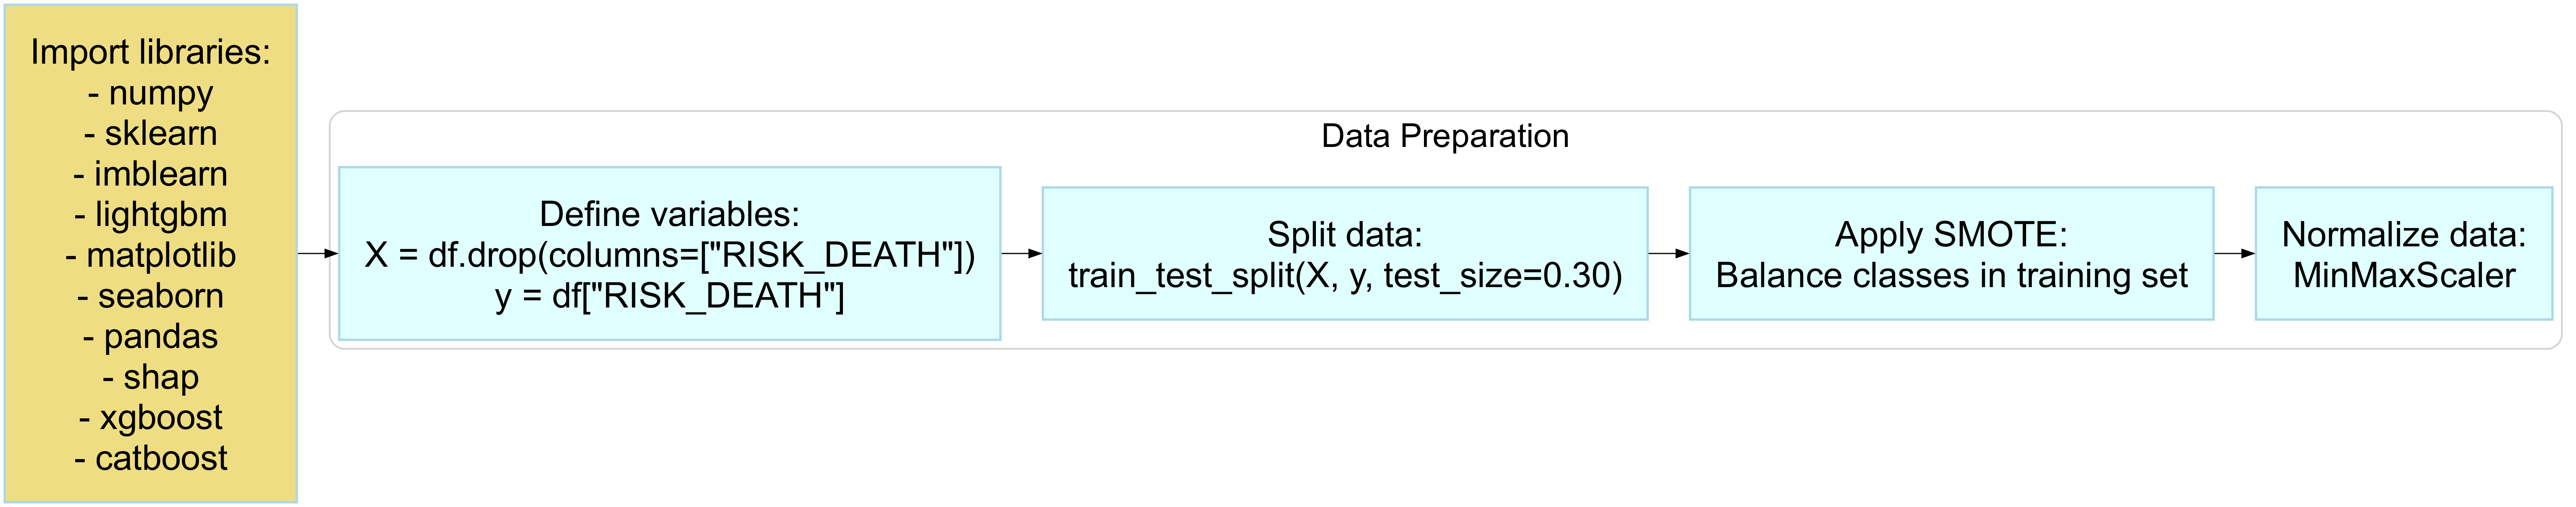

In [23]:
from graphviz import Digraph

# Create a new directed graph with a horizontal layout for Data Preparation
dot_data_prep = Digraph(comment='ML Workflow - Data Preparation', engine='dot')
dot_data_prep.attr(rankdir='LR', size='24,18', dpi='300')

# Define node attributes for a consistent style with larger font
dot_data_prep.attr('node', shape='box', style='filled', color='lightblue', fontname='Arial', fontsize='30', penwidth='2', margin='0.3', gradientangle='45', fontcolor='black')

# Add nodes with the provided texts
dot_data_prep.node('A', 'Import libraries:\n- numpy\n- sklearn\n- imblearn\n- lightgbm\n- matplotlib\n- seaborn\n- pandas\n- shap\n- xgboost\n- catboost', fillcolor='lightgoldenrod')

# Data Preparation
with dot_data_prep.subgraph(name='cluster_data_prep') as data_prep:
    data_prep.attr(label='Data Preparation', style='rounded', color='lightgrey', fontname='Arial', fontsize='28', penwidth='1.5')
    data_prep.node('B', 'Define variables:\nX = df.drop(columns=["RISK_DEATH"])\ny = df["RISK_DEATH"]', fillcolor='lightcyan')
    data_prep.node('C', 'Split data:\ntrain_test_split(X, y, test_size=0.30)', fillcolor='lightcyan')
    data_prep.node('D', 'Apply SMOTE:\nBalance classes in training set', fillcolor='lightcyan')
    data_prep.node('E', 'Normalize data:\nMinMaxScaler', fillcolor='lightcyan')
    data_prep.edges(['BC', 'CD', 'DE'])

# Add edge from library import to data preparation
dot_data_prep.edge('A', 'B')

# Save and render the flowchart for Data Preparation
dot_data_prep.render('flowchart_data_preparation', format='png', cleanup=True)

# Display the flowchart (optional, useful in Jupyter notebooks)
from IPython.display import Image
Image(filename='flowchart_data_preparation.png')


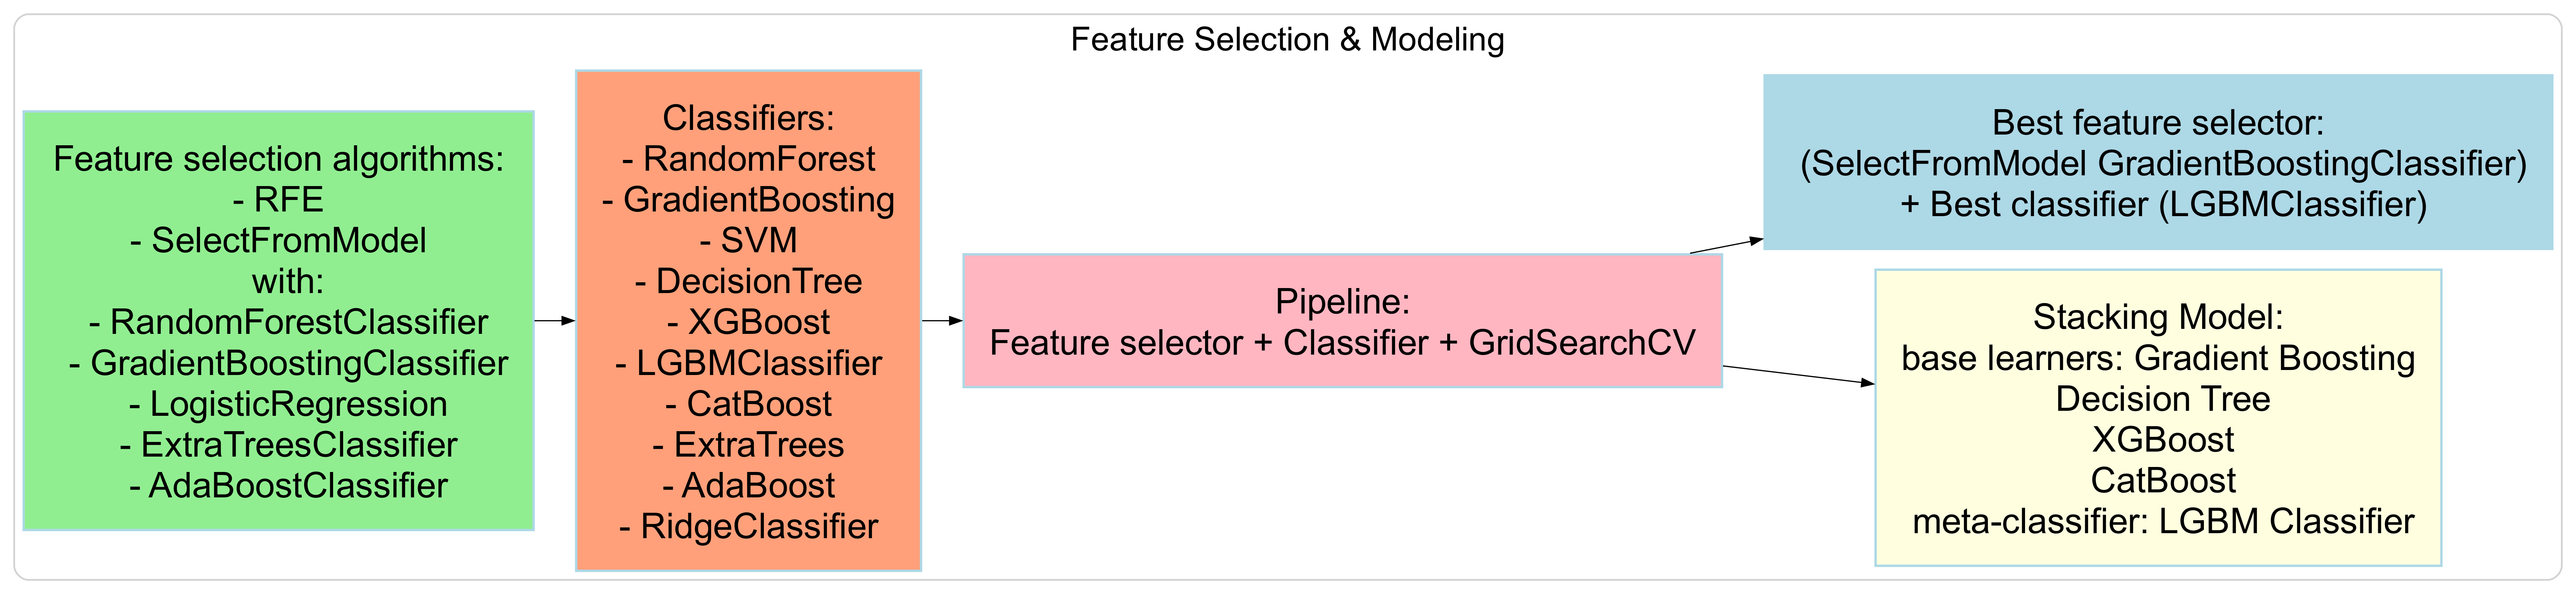

In [24]:
from graphviz import Digraph

# Create a new directed graph with a horizontal layout for Feature Selection and Modeling
dot_feature_model = Digraph(comment='ML Workflow - Feature Selection & Modeling', engine='dot')
dot_feature_model.attr(rankdir='LR', size='24,18', dpi='300')

# Define node attributes for a consistent style with larger font
dot_feature_model.attr('node', shape='box', style='filled', color='lightblue', fontname='Arial', fontsize='30', penwidth='2', margin='0.3', gradientangle='45', fontcolor='black')

# Feature Selection and Modeling
with dot_feature_model.subgraph(name='cluster_feature_model') as feature_model:
    feature_model.attr(label='Feature Selection & Modeling', style='rounded', color='lightgrey', fontname='Arial', fontsize='28', penwidth='1.5')
    feature_model.node('F', 'Feature selection algorithms:\n- RFE\n- SelectFromModel\n  with:\n  - RandomForestClassifier\n  - GradientBoostingClassifier\n  - LogisticRegression\n  - ExtraTreesClassifier\n  - AdaBoostClassifier', fillcolor='lightgreen')
    feature_model.node('G', 'Classifiers:\n- RandomForest\n- GradientBoosting\n- SVM\n- DecisionTree\n- XGBoost\n- LGBMClassifier\n- CatBoost\n- ExtraTrees\n- AdaBoost\n- RidgeClassifier', fillcolor='lightsalmon')
    feature_model.node('H', 'Pipeline:\nFeature selector + Classifier + GridSearchCV', fillcolor='lightpink')
    feature_model.node('I', 'Stacking Model:\nbase learners: Gradient Boosting\n Decision Tree\n XGBoost\n CatBoost\n meta-classifier: LGBM Classifier', fillcolor='lightyellow')
    feature_model.node('J', 'Best feature selector:\n (SelectFromModel GradientBoostingClassifier)\n + Best classifier (LGBMClassifier)', fillcolor='lightblue')
    feature_model.edges(['FG', 'GH', 'HI', 'HJ'])



# Save and render the flowchart for Feature Selection and Modeling
dot_feature_model.render('flowchart_feature_selection_modeling', format='png', cleanup=True)

# Display the flowchart
from IPython.display import Image
Image(filename='flowchart_feature_selection_modeling.png')

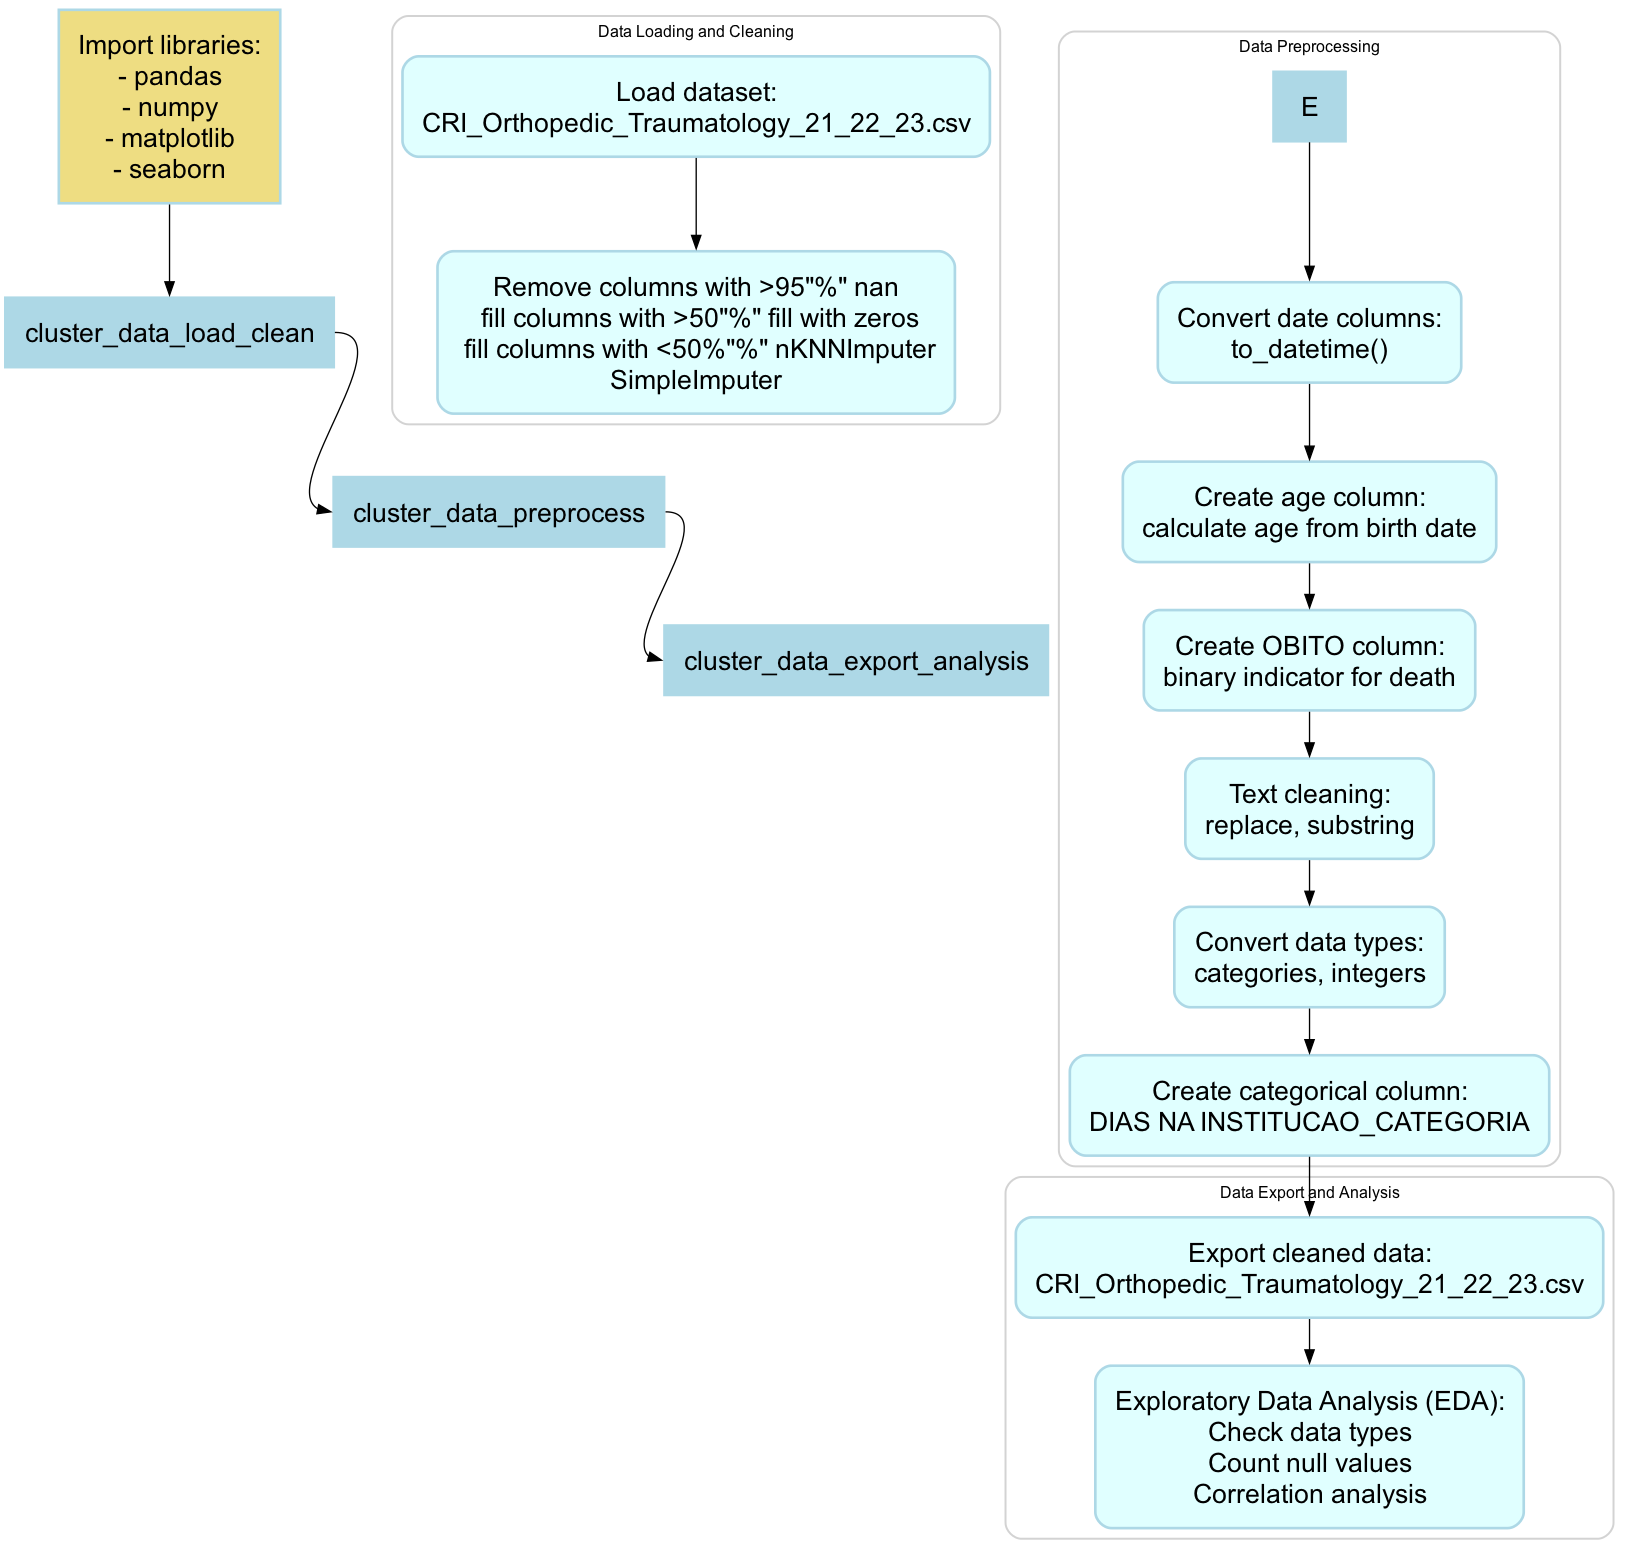

In [22]:
from graphviz import Digraph

# Create a new directed graph with a horizontal layout
dot = Digraph(comment='Data Processing Workflow')

# Define node attributes for a consistent style
dot.attr('node', shape='box', style='filled', color='lightblue', fontname='Arial', fontsize='20', penwidth='2', margin='0.2', gradientangle='45', fontcolor='black')

# Add nodes with the provided texts
dot.node('A', 'Import libraries:\n- pandas\n- numpy\n- matplotlib\n- seaborn', fillcolor='lightgoldenrod')

# Define subgraph for data loading and cleaning
with dot.subgraph(name='cluster_data_load_clean') as data_load_clean:
    data_load_clean.attr(label='Data Loading and Cleaning', style='rounded', color='lightgrey', fontname='Arial', fontsize='12', penwidth='1.5')
    data_load_clean.node('B', 'Load dataset:\nCRI_Orthopedic_Traumatology_21_22_23.csv', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_load_clean.node('C', 'Remove columns with >95"%" nan\n fill columns with >50"%" fill with zeros\n fill columns with <50%"%" nKNNImputer\nSimpleImputer', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_load_clean.edges([('B', 'C')])

# Define subgraph for data preprocessing
with dot.subgraph(name='cluster_data_preprocess') as data_preprocess:
    data_preprocess.attr(label='Data Preprocessing', style='rounded', color='lightgrey', fontname='Arial', fontsize='12', penwidth='1.5')
    data_preprocess.node('F', 'Convert date columns:\nto_datetime()', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.node('G', 'Create age column:\ncalculate age from birth date', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.node('H', 'Create OBITO column:\nbinary indicator for death', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.node('I', 'Text cleaning:\nreplace, substring', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.node('J', 'Convert data types:\ncategories, integers', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.node('K', 'Create categorical column:\nDIAS NA INSTITUCAO_CATEGORIA', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_preprocess.edges([('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'K')])

# Define subgraph for data export and analysis
with dot.subgraph(name='cluster_data_export_analysis') as data_export_analysis:
    data_export_analysis.attr(label='Data Export and Analysis', style='rounded', color='lightgrey', fontname='Arial', fontsize='12', penwidth='1.5')
    data_export_analysis.node('L', 'Export cleaned data:\nCRI_Orthopedic_Traumatology_21_22_23.csv', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_export_analysis.node('M', 'Exploratory Data Analysis (EDA):\nCheck data types\nCount null values\nCorrelation analysis', shape='box', fillcolor='lightcyan', style='rounded,filled')
    data_export_analysis.edges([('K', 'L'), ('L', 'M')])

# Add edges from main nodes to subgraphs
dot.edge('A', 'cluster_data_load_clean')
dot.edge('cluster_data_load_clean:e', 'cluster_data_preprocess:w')
dot.edge('cluster_data_preprocess:e', 'cluster_data_export_analysis:w')

# Save and render the flowchart
dot.render('data_processing_flowchart', format='png', cleanup=False)
# Display the flowchart (optional, useful in Jupyter notebooks)
from IPython.display import Image
Image(filename='data_processing_flowchart.png')

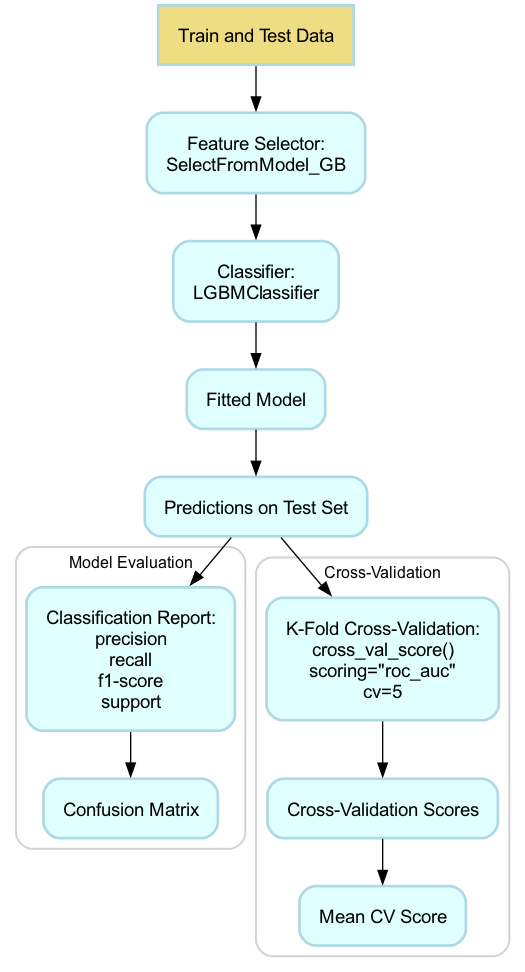

In [4]:
from graphviz import Digraph

# Create a new directed graph with a horizontal layout
dot = Digraph(comment='Metrics Evaluation Workflow')

# Define node attributes for a consistent style
dot.attr('node', shape='box', style='filled', color='lightblue', fontname='Arial', fontsize='14', penwidth='2', margin='0.2', gradientangle='45', fontcolor='black')

# Add nodes with the provided texts
dot.node('A', 'Train and Test Data', fillcolor='lightgoldenrod')
dot.node('B', 'Feature Selector:\nSelectFromModel_GB', fillcolor='lightcyan', style='rounded,filled')
dot.node('C', 'Classifier:\nLGBMClassifier', fillcolor='lightcyan', style='rounded,filled')
dot.node('D', 'Fitted Model', fillcolor='lightcyan', style='rounded,filled')
dot.node('E', 'Predictions on Test Set', fillcolor='lightcyan', style='rounded,filled')

# Define subgraph for model evaluation
with dot.subgraph(name='cluster_model_eval') as model_eval:
    model_eval.attr(label='Model Evaluation', style='rounded', color='lightgrey', fontname='Arial', fontsize='12', penwidth='1.5')
    model_eval.node('F', 'Classification Report:\nprecision\nrecall\nf1-score\nsupport', shape='box', fillcolor='lightcyan', style='rounded,filled')
    model_eval.node('G', 'Confusion Matrix', shape='box', fillcolor='lightcyan', style='rounded,filled')
    model_eval.edges([('F', 'G')])

# Define subgraph for cross-validation
with dot.subgraph(name='cluster_cross_val') as cross_val:
    cross_val.attr(label='Cross-Validation', style='rounded', color='lightgrey', fontname='Arial', fontsize='12', penwidth='1.5')
    cross_val.node('H', 'K-Fold Cross-Validation:\ncross_val_score()\nscoring="roc_auc"\ncv=5', shape='box', fillcolor='lightcyan', style='rounded,filled')
    cross_val.node('I', 'Cross-Validation Scores', shape='box', fillcolor='lightcyan', style='rounded,filled')
    cross_val.node('J', 'Mean CV Score', shape='box', fillcolor='lightcyan', style='rounded,filled')
    cross_val.edges([('H', 'I'), ('I', 'J')])

# Add edges between nodes
dot.edges([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('E', 'H')])

# Save and render the flowchart
dot.render('metrics_evaluation_flowchart', format='png', cleanup=False)
# Display the flowchart (optional, useful in Jupyter notebooks)
from IPython.display import Image
Image(filename='metrics_evaluation_flowchart.png')